In [12]:
import math

def kurbelwinkel_zu_hub(kurbelwinkel_grad, pleuelstange_mm, hub_mm, exakte_formel=True):
    """
    Berechnet den Kolbenweg vom oberen Totpunkt (OT) basierend auf dem Kurbelwinkel.

    Die Formel stammt aus dem Buch "Zweitakt-Motoren Tuning" von Christian Rieck, Seite 112.
    #Formel (27): s = r * (1 + l/r - cos(phi) - sqrt((l/r)**2 - sin(phi)**2))
    Formel (27): s = r * (1 + r/(4*l) - cos(phi) - r/(4*l)*cos(2*phi)))

    Args:
        kurbelwinkel_grad (float): Der Kurbelwinkel in Grad nach dem OT.
        pleuelstange_mm (float): Die Länge der Pleuelstange in mm.
        hub_mm (float): Der Gesamthub des Motors in mm.

    Returns:
        float: Der Weg des Kolbens vom oberen Totpunkt (OT) in mm.
    """
    # Kurbelradius ist der halbe Hub
    radius_mm = hub_mm / 2.0
    
    # Umrechnung des Winkels von Grad in Radiant für die math-Funktionen
    kurbelwinkel_rad = math.radians(kurbelwinkel_grad)
    
    if exakte_formel:
        # Verhältnis von Pleuellänge zu Kurbelradius
        l_r_verhaeltnis = pleuelstange_mm / radius_mm
    
        # Berechnung des Teils unter der Wurzel
        # Sicherstellen, dass der Wert nicht negativ wird (kann bei 90/270 Grad durch Rundungsfehler passieren)
        innerhalb_der_wurzel = l_r_verhaeltnis**2 - math.sin(kurbelwinkel_rad)**2
        if innerhalb_der_wurzel < 0:
            innerhalb_der_wurzel = 0
        kolbenweg_s = radius_mm * (1 + l_r_verhaeltnis - math.cos(kurbelwinkel_rad) - math.sqrt(innerhalb_der_wurzel))
    else: 
        # Berechnung des Kolbenwegs 's' nach der Formel im Buch (Annäherung über Taylor - wahrscheinlich genau genug)
        r4l = radius_mm/(4*pleuelstange_mm)
        kolbenweg_s = radius_mm * (1 + r4l - math.cos(kurbelwinkel_rad) - r4l* math.cos(2*kurbelwinkel_rad))
  
    return kolbenweg_s

# --- Beispielanwendung ---
# Bitte passen Sie diese Werte für Ihren Motor an.
MOTOR_HUB = 44.0      # Gesamthub des Motors in mm
MOTOR_PLEUEL = 85.0   # Länge der Pleuelstange von Auge zu Auge in mm
WINKEL = 7         # Kurbelwinkel in Grad nach OT

# Berechnung durchführen
kolbenweg = kurbelwinkel_zu_hub(WINKEL, MOTOR_PLEUEL, MOTOR_HUB)

# Ergebnis ausgeben
print(f"Parameter:")
print(f"  Hub: {MOTOR_HUB} mm")
print(f"  Pleuellänge: {MOTOR_PLEUEL} mm")
print("-" * 20)
print(f"Bei einem Kurbelwinkel von {WINKEL}° beträgt der Kolbenweg vom OT: {kolbenweg:.4f} mm")

# Beispiel für 180 Grad (sollte dem vollen Hub entsprechen)
kolbenweg_180 = kurbelwinkel_zu_hub(180, MOTOR_PLEUEL, MOTOR_HUB)
print(f"Bei einem Kurbelwinkel von 180° beträgt der Kolbenweg vom OT: {kolbenweg_180:.4f} mm")



Parameter:
  Hub: 44.0 mm
  Pleuellänge: 85.0 mm
--------------------
Bei einem Kurbelwinkel von 7° beträgt der Kolbenweg vom OT: 0.2063 mm
Bei einem Kurbelwinkel von 180° beträgt der Kolbenweg vom OT: 44.0000 mm


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]


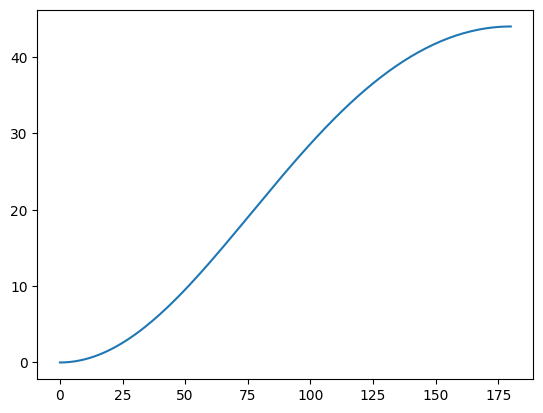

In [ ]:
import matplotlib.pyplot as plt

phi_range = list(range(180+1))
s_range = [kurbelwinkel_zu_hub(x, MOTOR_PLEUEL, MOTOR_HUB) for x in phi_range]

plt.plot(phi_range, s_range)
plt.show()
    

In [13]:
import math

def kurbelwinkel_zu_hub_exakt(kurbelwinkel_grad, pleuelstange_mm, hub_mm):
    """
    Berechnet den Kolbenweg mit der exakten geometrischen Formel.
    (Diese Funktion wird von der Umkehrfunktion benötigt)
    """
    radius_mm = hub_mm / 2.0
    kurbelwinkel_rad = math.radians(kurbelwinkel_grad)
    l_r_verhaeltnis = pleuelstange_mm / radius_mm
    
    # Rundungsfehler bei 90/270 Grad abfangen
    innerhalb_der_wurzel_wert = l_r_verhaeltnis**2 - math.sin(kurbelwinkel_rad)**2
    if innerhalb_der_wurzel_wert < 0:
        innerhalb_der_wurzel_wert = 0

    kolbenweg_s = radius_mm * (
        1 + l_r_verhaeltnis - math.cos(kurbelwinkel_rad) - math.sqrt(innerhalb_der_wurzel_wert)
    )
    return kolbenweg_s

def hub_zu_kurbelwinkel(kolbenweg_mm, pleuelstange_mm, hub_mm, toleranz=0.0001):
    """
    Berechnet den Kurbelwinkel (in Grad vor OT) für einen gegebenen Kolbenweg.
    Löst das Problem durch iterative Annäherung (Intervallschachtelung).

    Args:
        kolbenweg_mm (float): Der gewünschte Kolbenweg in mm vor OT.
        pleuelstange_mm (float): Die Länge der Pleuelstange in mm.
        hub_mm (float): Der Gesamthub des Motors in mm.
        toleranz (float): Die gewünschte Genauigkeit der Berechnung.

    Returns:
        float: Der berechnete Kurbelwinkel in Grad.
    """
    # Suchbereich für den Winkel definieren (0 bis 90 Grad ist ausreichend)
    winkel_unten = 0.0
    winkel_oben = 90.0
    
    # Iteration starten
    for _ in range(100): # 100 Iterationen sind mehr als genug für hohe Präzision
        test_winkel = (winkel_unten + winkel_oben) / 2
        berechneter_hub = kurbelwinkel_zu_hub_exakt(test_winkel, pleuelstange_mm, hub_mm)
        
        # Prüfen, ob die Genauigkeit erreicht ist
        if abs(berechneter_hub - kolbenweg_mm) < toleranz:
            return test_winkel
        
        # Suchbereich anpassen
        if berechneter_hub > kolbenweg_mm:
            winkel_oben = test_winkel
        else:
            winkel_unten = test_winkel
            
    # Falls nach 100 Iterationen keine Lösung gefunden wurde (sollte nie passieren)
    return (winkel_unten + winkel_oben) / 2

# --- Beispielanwendung für den Sachs 505 ---
# Bitte passen Sie diese Werte für Ihren Motor an.
# Standardwerte für Sachs 505/2 B/C/D (z.B. aus Hercules Prima 5)
MOTOR_HUB = 44.0      # Gesamthub des Motors in mm
MOTOR_PLEUEL = 85.0   # Länge der Pleuelstange von Auge zu Auge in mm
KOLBENWEG_VOR_OT = 2.0 # Gewünschter Zündzeitpunkt in mm vor OT

# Berechnung durchführen
winkel_vor_ot = hub_zu_kurbelwinkel(KOLBENWEG_VOR_OT, MOTOR_PLEUEL, MOTOR_HUB)

# Ergebnis ausgeben
print(f"Parameter:")
print(f"  Hub: {MOTOR_HUB} mm")
print(f"  Pleuellänge: {MOTOR_PLEUEL} mm")
print("-" * 30)
print(f"Ein Kolbenweg von {KOLBENWEG_VOR_OT} mm vor OT entspricht einem")
print(f"Kurbelwinkel von: {winkel_vor_ot:.2f}°")

Parameter:
  Hub: 44.0 mm
  Pleuellänge: 85.0 mm
------------------------------
Ein Kolbenweg von 2.0 mm vor OT entspricht einem
Kurbelwinkel von: 21.99°


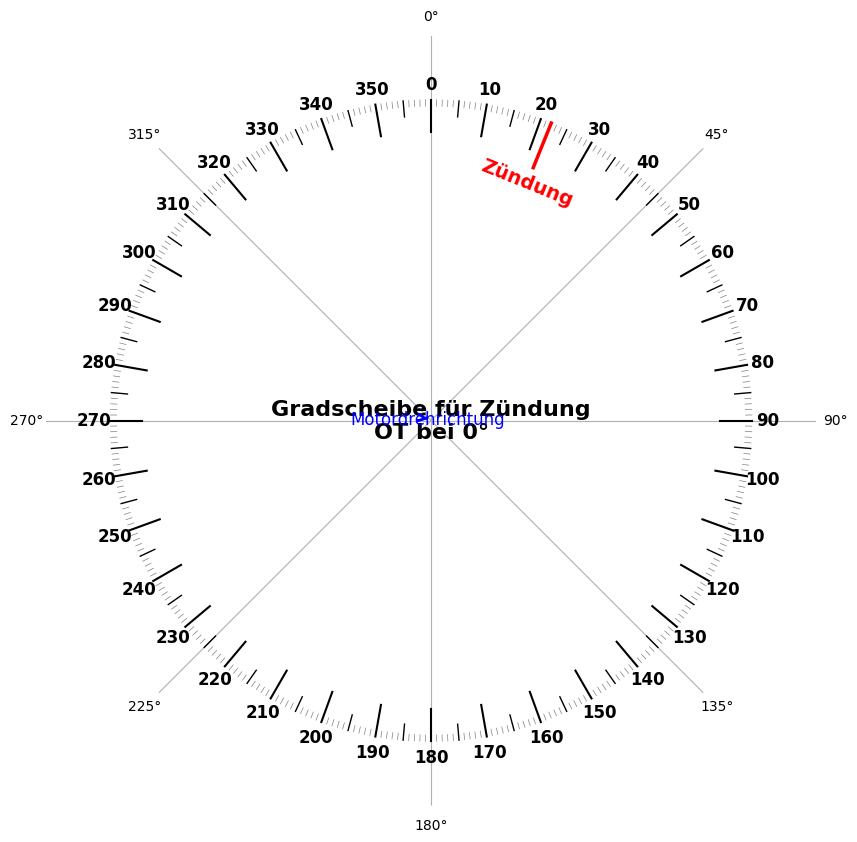

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# --- HIER DEN GEWÜNSCHTEN ZÜNDWINKEL EINTRAGEN ---
# Dieser Wert wurde aus der vorherigen Berechnung (2mm Hub -> Winkel) ermittelt.
ZUENDWINKEL_VOR_OT = 22.00  # in Grad

# --- Konfiguration für das Aussehen ---
FIGUR_GROESSE = 10  # Größe der Figur in Zoll (ca. 25 cm)
DATEINAME = 'gradscheibe_zündung.png'

def plotte_gradscheibe(zuendwinkel, save_file=False):
    """
    Erstellt und speichert eine druckbare Gradscheibe zur Einstellung der Zündung.
    """
    fig, ax = plt.subplots(figsize=(FIGUR_GROESSE, FIGUR_GROESSE), subplot_kw={'projection': 'polar'})
    
    # Plot-Bereich einrichten
    ax.set_theta_zero_location('N')  # 0 Grad (OT) nach oben
    ax.set_theta_direction(-1)       # Gradzahlen im Uhrzeigersinn (wie bei den meisten Gradscheiben)
    ax.set_yticklabels([])           # Radiale Achsenbeschriftung entfernen
    ax.set_rgrids([])                # Radiale Gitterlinien entfernen
    ax.spines['polar'].set_visible(False) # Äußeren Kreis des Plots entfernen
    ax.set_ylim(0, 1.2)

    # Grad-Markierungen und Beschriftungen zeichnen
    for grad in range(0, 360):
        winkel_rad = np.deg2rad(grad)
        if grad % 10 == 0:
            # Lange Linie und Text für 10er-Schritte
            ax.plot([winkel_rad, winkel_rad], [0.9, 1.0], color='black', linewidth=1.5)
            ax.text(winkel_rad, 1.05, str(grad), ha='center', va='center', fontsize=12, weight='bold')
        elif grad % 5 == 0:
            # Mittlere Linie für 5er-Schritte
            ax.plot([winkel_rad, winkel_rad], [0.95, 1.0], color='black', linewidth=1)
        else:
            # Kurze Linie für 1er-Schritte
            ax.plot([winkel_rad, winkel_rad], [0.98, 1.0], color='gray', linewidth=0.5)

    # Zündzeitpunkt markieren (rote Linie)
    zuendwinkel_rad = np.deg2rad(zuendwinkel)
    ax.plot([zuendwinkel_rad, zuendwinkel_rad], [0.85, 1.0], color='red', linewidth=2.5, zorder=10)
    ax.text(zuendwinkel_rad, 0.8, 'Zündung', ha='center', va='center', fontsize=14, weight='bold', color='red', rotation=-zuendwinkel)

    # Titel und Drehrichtungspfeil hinzufügen
    ax.text(0, 0, 'Gradscheibe für Zündung\nOT bei 0°', ha='center', va='center', fontsize=16, weight='bold')
    ax.annotate('Motordrehrichtung',
                xy=np.deg2rad([300, 1]), xytext=np.deg2rad([300, 0.6]),
                arrowprops=dict(arrowstyle="<-", color="blue", linewidth=2, connectionstyle="arc3,rad=-0.2"),
                ha='center', va='center', fontsize=12, color='blue')

    # Speichern der Datei
    if save_file:
        plt.savefig(DATEINAME, dpi=300, bbox_inches='tight')
        print(f"Gradscheibe wurde erfolgreich als '{DATEINAME}' gespeichert.")
    plt.show()
    plt.close(fig)

# Skript ausführen
plotte_gradscheibe(ZUENDWINKEL_VOR_OT)
